In [1]:
import math
import matplotlib.pyplot as plt
from DIY import adaptive_step_rk, adaptive_step_rk_2var

### Problem 1 - Solution for a first-order ODE

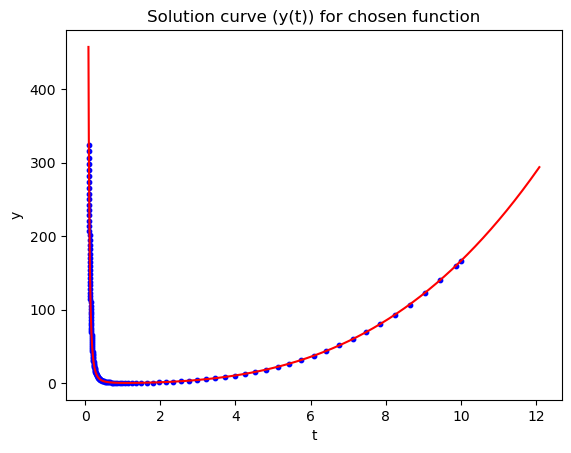

In [2]:
def func(t,y):
    f = t**2 - 3*y/t
    return f

def soln_curve(t):
    f = (t**3)/6 + 1/(3*t**3)
    return f
#y(0.1) is almost equal to 333.33
solution = adaptive_step_rk(0.1, 0.1, 10, 333.33, func, 0.00001)

T_analytic = []
Y_analytic = []
t = 0.08

analytic_step = 0.01
for k in range(1200):
    t+=analytic_step
    T_analytic.append(t)
    Y_analytic.append(soln_curve(t))

plt.scatter(solution[0], solution[1], s=10, c='blue')
plt.plot(T_analytic, Y_analytic, c='red')
plt.title("Solution curve (y(t)) for chosen function")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

### Problem 2 - The Earth Hole problem

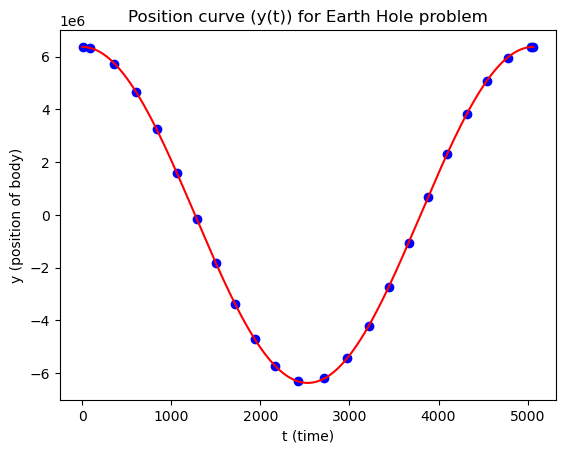

In [3]:
#as described in the report, we define dy/dt (velocity)
def velocity(t, y):
    g = 9.81
    R = 6.37e6
    y0 = 6.37e6
    ydot = -y0*((g/R)**(1/2))*math.sin(t*(g/R)**(1/2))
    return ydot

#we also define a function (pos) for the solution curve to check our result's accuracy
def pos(t):
    g = 9.81
    R = 6.37e6
    y0 = 6.37e6
    y = y0*math.cos(t*(g/R)**(1/2))
    return y
#here, the centre of the earth lies at y = 0
h_initial = 5
pos_initial = 6.37e6 #initial position of body
t_initial = 0
t_final = 5063
epsilon_e = 0.001

t_analytic = []
pos_analytic = []

position = adaptive_step_rk(h_initial, t_initial, t_final, pos_initial, velocity, epsilon_e)

t = 0
analytic_step = 5063/10000
for k in range(10000):
    t+=analytic_step
    t_analytic.append(t)
    pos_analytic.append(pos(t))

plt.plot(t_analytic, pos_analytic, 'r-')
plt.scatter(position[0], position[1], c='blue')
plt.title("Position curve (y(t)) for Earth Hole problem")
plt.xlabel("t (time)")
plt.ylabel("y (position of body)")
plt.show()

### Problem 3 - Predator-Prey system

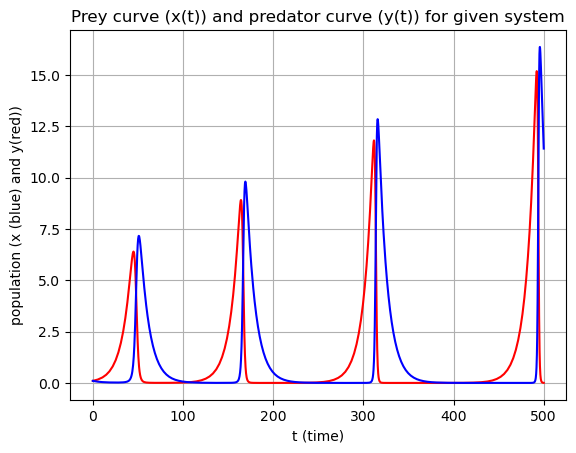

In [5]:
def prey_rate(t, x, y):
    a = 0.1 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.1 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t (time)")
plt.ylabel("population (x (blue) and y(red))")
plt.grid()
plt.show()